In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing df and giving proper column names to all the features
df = pd.read_csv('wine.xls',names = ['Cultivator','Alcohol','Malic_Acid','Ash','Alcalinity_of_Ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoids_phenol','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoids_phenol    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#Checking the shape of df(rows,columns)
df.shape

(178, 14)

In [5]:
#Lets see the summary statistics of df
df.describe()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


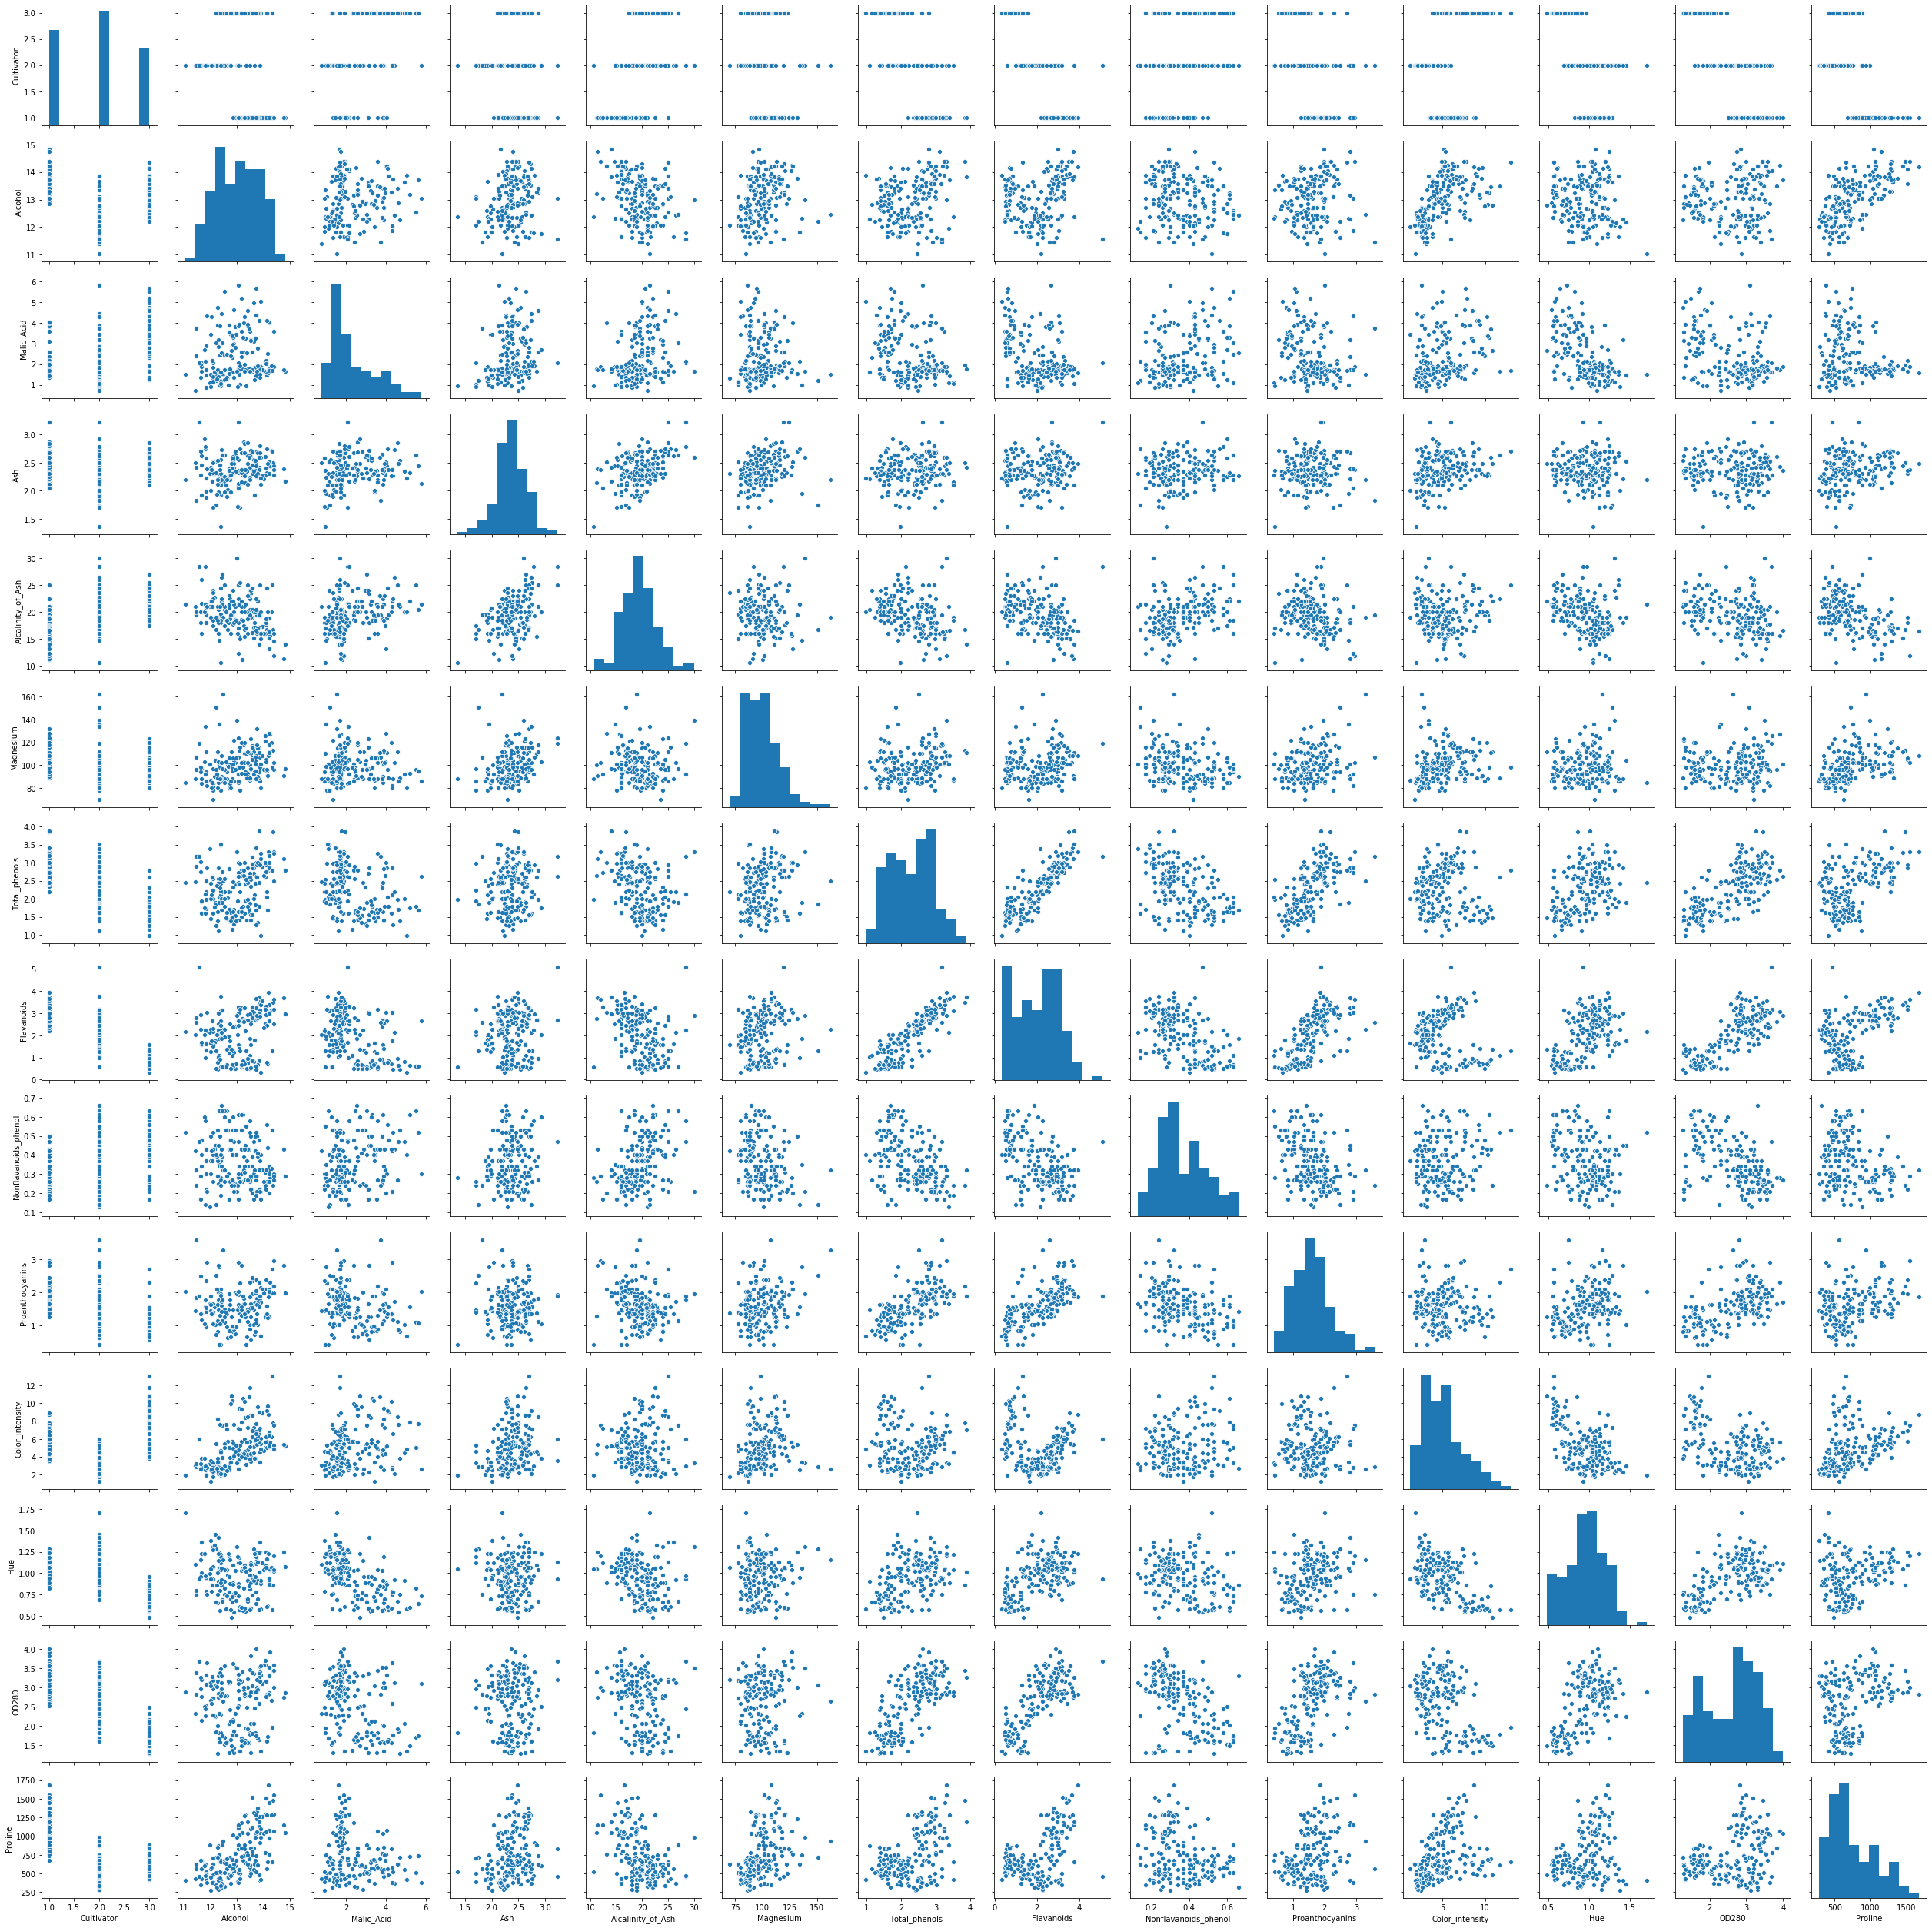

In [6]:
sns.pairplot(df)

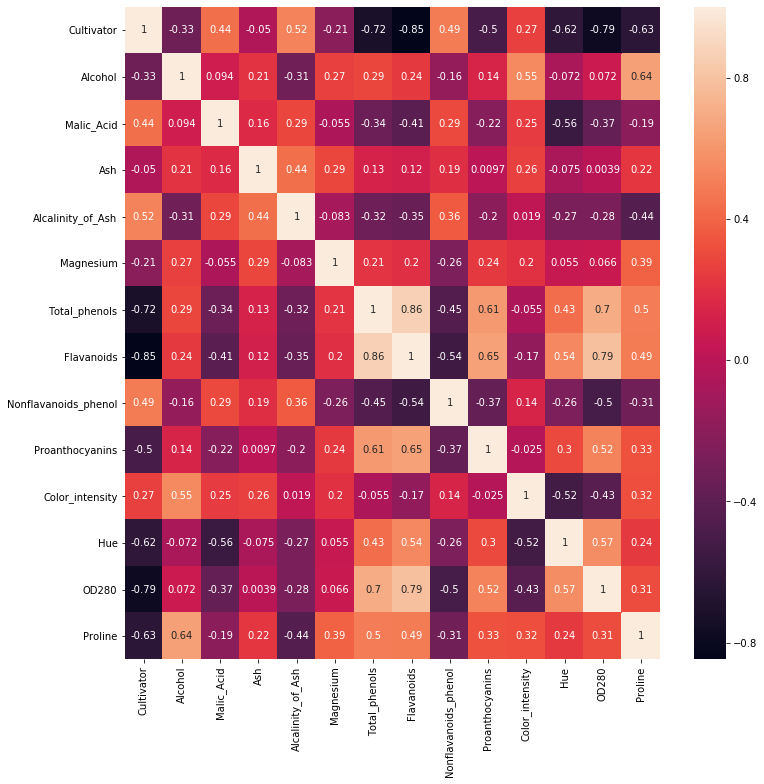

In [7]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

In [8]:
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

- By this pairplot we have to see the overlapping of three classes

In [9]:
#As in USL target is not used so we separate it
y = df['Cultivator']
X = df.drop('Cultivator',1)

In [10]:
#Appyling zscore
from scipy.stats import zscore

X_scaled = X.apply(zscore)
X_scaled.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## KMeans Clustering

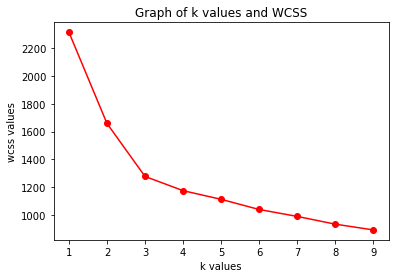

In [11]:
from sklearn.cluster import KMeans


wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

- At K = 3 ,error is reduced at large,after that there is constant(Small) reduction

In [12]:
wcss

[2313.9999999999986,
 1658.7588524290961,
 1277.928488844643,
 1175.7051928197127,
 1113.3562749404155,
 1040.4406503650266,
 990.5823179454998,
 935.0271001462928,
 893.6122442671154]

In [13]:
#now building model with k = 3
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3,random_state = 101)

#training the model
clusters = kmeans.fit_predict(X_scaled)

#adding a label feature with predicted class value
df_k = df.copy(deep = True)
df_k['labels'] = clusters
df_k.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [14]:
#kmeans value count
df_k['labels'].value_counts()

2    65
0    62
1    51
Name: labels, dtype: int64

In [15]:
#original data value counts
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [16]:
#Check centroid value for each cluster and store it in new dataframe
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns = list(X_scaled))
centroids_df

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


- Features helping the clusters are Alcohol,Ash,Flavanoids

In [17]:
#calculating inertia
kmeans.inertia_

1277.928488844643

In [18]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(X_scaled,kmeans.labels_)

0.2848589191898987

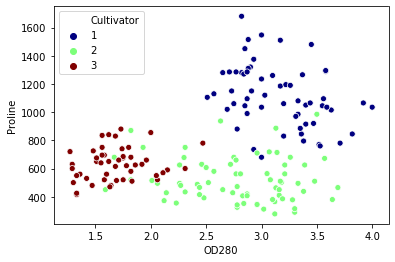

In [19]:
#original data
sns.scatterplot(x = 'OD280',y = 'Proline',data = df,hue = 'Cultivator',palette='jet',legend='full')

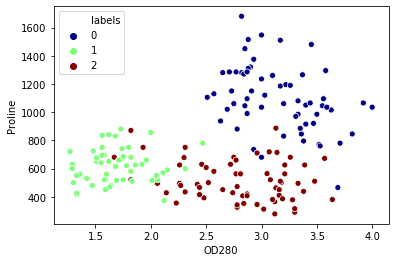

In [20]:
#kmeans data
sns.scatterplot(x = 'OD280',y = 'Proline',data = df_k,hue = 'labels',palette='jet',legend = 'full')

# Agglomerative Clustering

### Cophenetic Index

- **Used to find best linkage method**
- **It is a measure of the correlation between the distance of points in feature space and distance on dendogram**
- **Closer it is to 1,the better the clustering is,it represents the tightness of cluster**

In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [22]:
Z = linkage(X_scaled, 'complete')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(X_scaled))

c

0.5916829459078577

In [23]:
Z1 = linkage(X_scaled, 'single')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z1 , pdist(X_scaled))

c

0.5436231199247621

In [24]:
Z2 = linkage(X_scaled, 'average')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z2 , pdist(X_scaled))

c

0.7590840545998375

In [25]:
Z3 = linkage(X_scaled, 'ward')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z3 , pdist(X_scaled))

c

0.6623487206613261

- **We should go with Highest Cophenetic Score**
- **Still we are using ward as it is giving good dendogram**

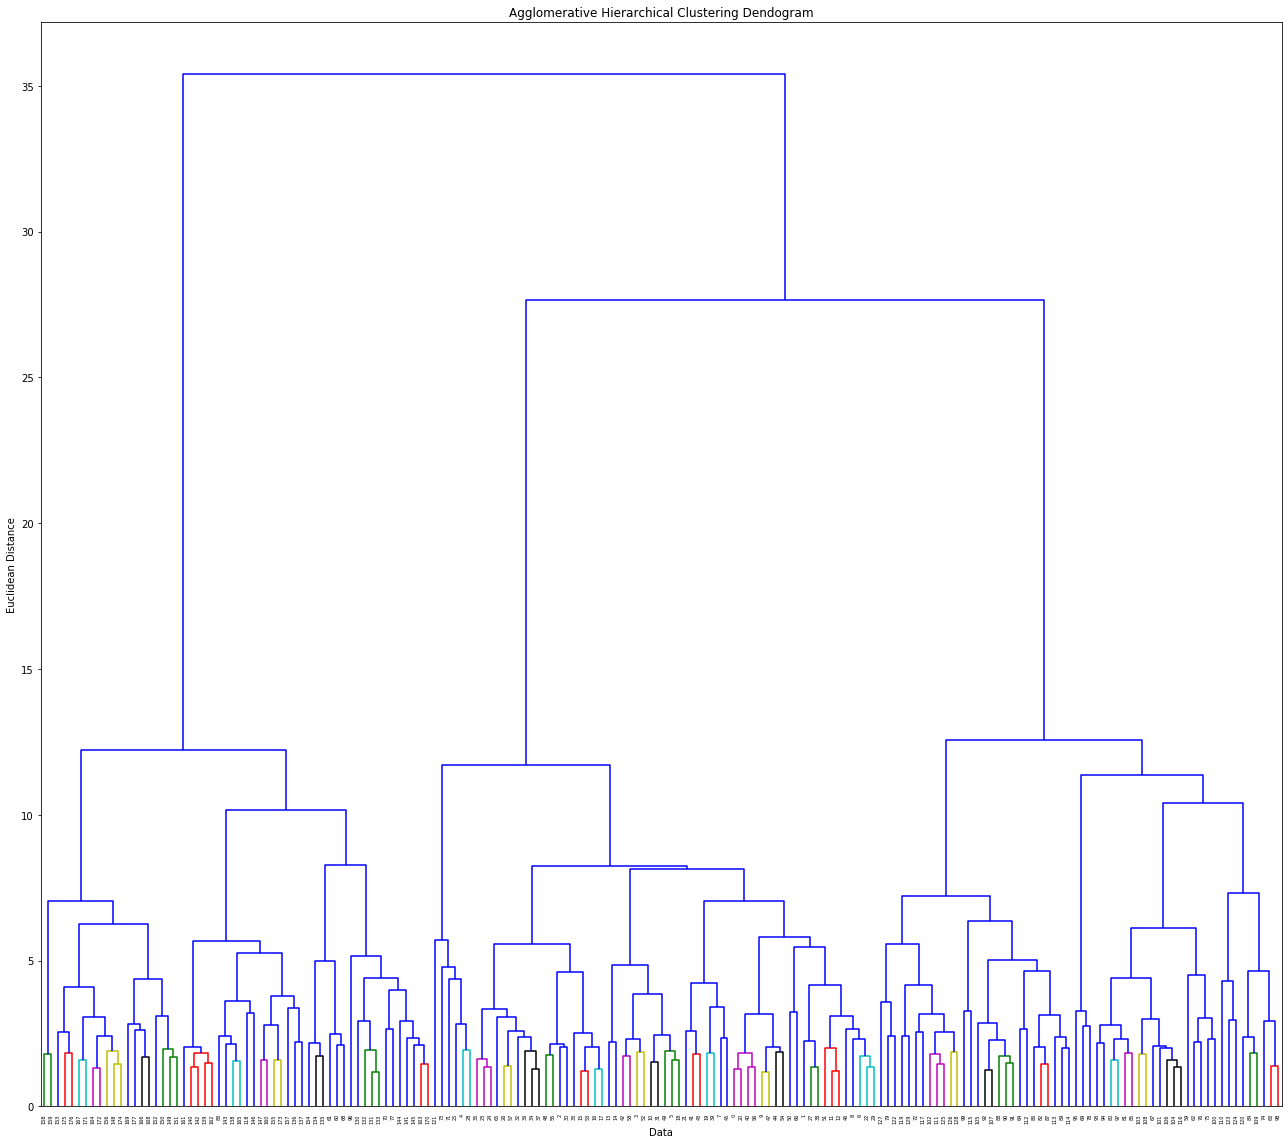

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Data')
plt.ylabel('Euclidean Distance')
Z3 = linkage(X_scaled, 'ward')
dendrogram(Z3,leaf_rotation=90.0,p=5,color_threshold=2)
plt.tight_layout()

- As average score is high we used Average in Dendogram,but dendogram visualzation is not good
- So we went for ward,its giving better dendogram visualization

In [27]:
#Building model using Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
agg.fit(X_scaled)

df_h = X_scaled.copy(deep = True)
df_h['label'] = clusters

In [28]:
df_h['label'].value_counts()

2    65
0    62
1    51
Name: label, dtype: int64

In [49]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(X_scaled,agg.labels_)

0.2682119551309822

#Comparison of both the models(FACULTY)
Kmeans clustering                         Agglomerative clustering
label-Data   cluster_no-Data              label-Data   cluster_no-Data

1 - 71        2 - 62                       1 - 71         2 - 64
2 - 59        0 - 65                       2 - 59         0 - 58
3 - 48        1 - 51                       3 - 48         1 - 56

#Comparison of both the models(AVISH)
Kmeans clustering                         Agglomerative clustering
label-Datacluster_no-Data              label-Data   cluster_no-Data

2 - 71        2 - 65                       2 - 71         2 - 65
1 - 59        0 - 62                       1 - 59         0 - 62
3 - 48        1 - 51                       3 - 48         1 - 51

As there is redundency in data,Apply PCA

# PCA

### Steps to perform PCA


**1.Calculate Covariance matrix
2.Calculate eigen values and eigen vectors
3.Pairing the eigen values and vectors
4.Sorting
5A - Transpose
6A - Dot product with features
7.Apply model
For dimensionality reduction
5B - Select the appropriate components
6B - Dot product**



In [29]:
#Step-1 Find the covariance matrix of X

#obtain covariance matrix for X
cov_matrix = np.cov(X_scaled,rowvar = False)

#Note that covariance matrix is 13x13 since it has 13 features
print('Covariance matrix of X is',cov_matrix)

Covariance matrix of X is [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.5009290

In [30]:
#Step-2 Obtain eigen values and eigen vectors

eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

#eigenvectors is 8x8 matrix
print('Eigenvectors of Cov(X)',eigenvectors)

#eigenvalues is a 8x1 vector
print('Eigenvalues of Cov(X)',eigenvalues)

Eigenvectors of Cov(X) [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]


In [31]:
#Step 3: Sort eigenvalues in descending order

#Make a set of (eigenvalues,eigenvectors) pairs
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

#Sort the (eigenvalues,eigenvectors) pairs from highest to lowest with respect to eigen values
eig_pairs.sort()
eig_pairs.reverse()

#Extract the descending ordered eigenvalues and eigenvectors
eigenvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvectors))]

#Lets confirm our sorting worked,print out eigenvalues
print('EigenValues in descending order: \n%s'%eigenvalues_sort)

EigenValues in descending order: 
[4.732436977583593, 2.511080929645122, 1.4542418678464688, 0.9241658668248742, 0.8580486765371106, 0.6452822124678536, 0.5541414662457844, 0.3504662749462538, 0.2905120326939766, 0.2523200103608249, 0.22706428173088491, 0.16972373898012177, 0.1039619918207529]


In [32]:
tot = sum(eigenvalues)
var_explained = [(i/tot)*100 for i in sorted(eigenvalues,reverse = True)]  #an array of variance explained by each

cum_var_exp = np.cumsum(var_explained) 
print(cum_var_exp)

[ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


- **The threshold that we decide for variance is upto us.**
- **Here we can go for 7 if we take that it captures upto 90% or 9 if we go upto 95%.**
- **We should utilize atleast 90 % of data so we will go with 7 pca**

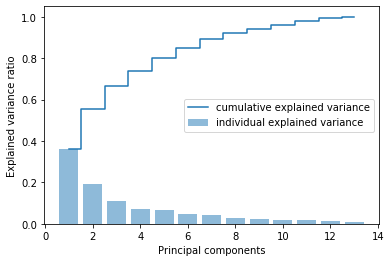

In [33]:
tot = sum(eigenvalues)
var_explained = [(i/tot) for i in sorted(eigenvalues,reverse = True)]  #an array of variance explained by each

cum_var_exp = np.cumsum(var_explained) 


plt.bar(range (1,14), var_explained, alpha = 0.5, align = 'center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend (loc = 'best')
plt.show()

In [67]:
#Step 4: Project data onto 2d

# Keep the first seven principal components
#P_reduce is 13 x 7 matrix
P_reduce = np.array(eigenvectors_sort[0:7]).transpose()

# Let's project data onto 2D space 
Proj_data_2D = np.dot(X_scaled,P_reduce)


X_scaled.shape, P_reduce.shape,Proj_data_2D.shape


((178, 13), (13, 7), (178, 7))

# Applying Kmeans and Agglomerative Clustering on PCA features

### Kmeans Clustering

In [68]:
#now Applying Pca features on Kmeans
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3,random_state = 101)

#training the model
clusters = kmeans.fit_predict(Proj_data_2D)

#adding a label feature with predicted class value
df_k = df.copy(deep = True)
df_k['labels'] = clusters
df_k.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity,Hue,OD280,Proline,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [69]:
kmeans.inertia_

1032.4055597618128

In [70]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(Proj_data_2D,kmeans.labels_)

0.32763517224028216

In [38]:
#Check centroid value for each cluster and store it in new dataframe
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids)
centroids_df

,0,1,2,3,4,5,6
0,-2.276194,0.932054,-0.001528,-0.135498,-0.134912,0.218283,-0.052110
1,2.720036,1.125651,0.239093,0.062457,0.073676,-0.099925,0.060383
2,0.036957,-1.772239,-0.186139,0.080240,0.070878,-0.129806,0.002327


- **From the centroid values we can see that feature Alcohol,the clusters formed are distinct centroids.Which means clustering algorithm has performed well and identified 3 clusters correctly.Same can be said for features:Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenol,Proanthocyanins,Color_intensity**

- **Inertia reduced from 1277.928488844643 to 1032.4055597618128**
- **Silhouette Score increased from 0.2848589191898987 to 0.32763517224028216**

### AGC 

In [39]:
# #now Applying Pca features on Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
agg.fit(Proj_data_2D)

df_h = X_scaled.copy(deep = True)
df_h['label'] = clusters

In [40]:
df_h['label'].value_counts()

2    65
0    62
1    51
Name: label, dtype: int64

In [50]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(X_scaled,agg.labels_)

0.2682119551309822

# Classification Algorithms

## Logistic Regression without PCA

In [41]:
from sklearn.model_selection import train_test_split

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=seed)

In [42]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9629629629629629
[[13  0  0]
 [ 0 23  1]
 [ 0  1 16]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.96      0.96      0.96        24
           3       0.94      0.94      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



## Logistic Regression with PCA

In [43]:
from sklearn.model_selection import train_test_split

seed = 7
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=seed)

In [44]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9814814814814815
[[13  0  0]
 [ 0 24  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.96      0.98        25
           3       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



- **Accuracy increased from 96 to 98 after using PCA**

## Random Forest without PCA

In [45]:
from sklearn.model_selection import train_test_split

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=seed)

In [46]:
#Applying Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
[[13  0  0]
 [ 0 24  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Random Forest with PCA

In [47]:
from sklearn.model_selection import train_test_split

seed = 7
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=seed)

In [48]:
#Applying Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9814814814814815
[[13  0  0]
 [ 0 24  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.96      0.98        25
           3       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



- **Accuracy reduced from 100 to 98**